### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [29]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [30]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [31]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
X_train.shape

(60000, 784)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
y_train.shape

(60000,)

#### Extract Test data

In [35]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [36]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
X_test.shape

(10000, 784)

In [38]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [39]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

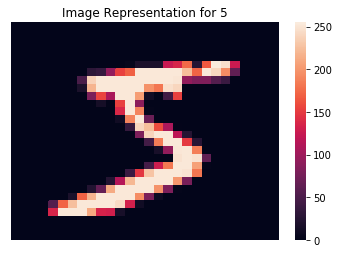

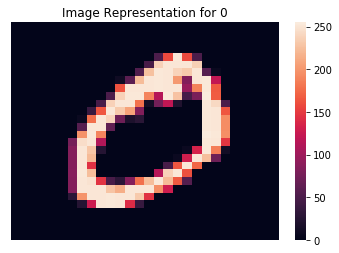

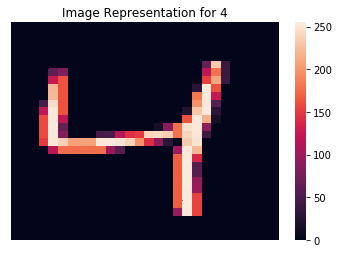

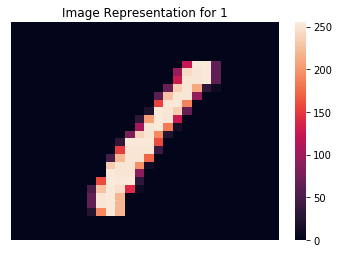

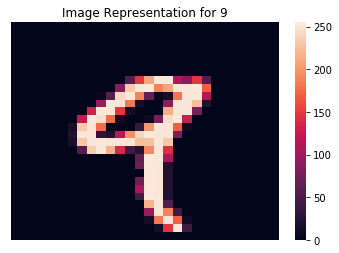

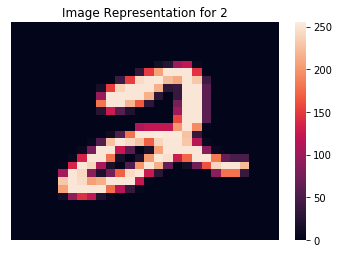

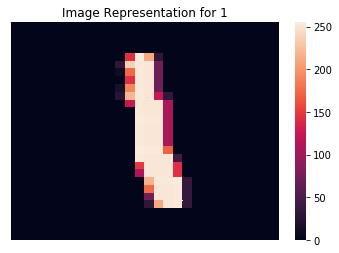

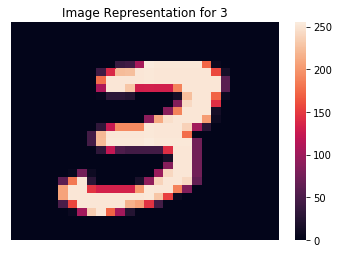

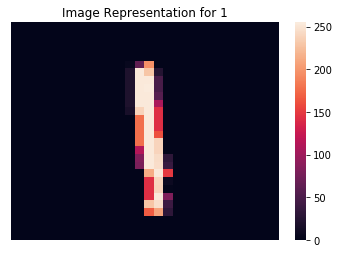

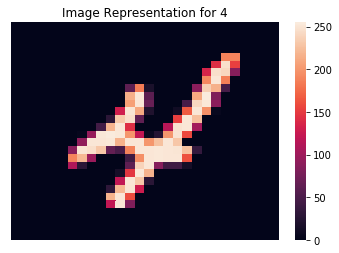

In [41]:
for i in range(10):
    display(X_train[i],y_train[i])

# RBF classifier

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

#X_train = X_train/255
#X_test = X_test/255
X_train = scaler.fit_transform(X_train.astype(np.float64))
clf = SVC(max_iter = 700, gamma= 0.005, kernel='rbf')


y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

clf.fit(X_train, y_train)

C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=700, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Calculate Cross Validation Score

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([ 0.94096181,  0.94219711,  0.94504176])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [61]:
y_train_pred

array([3, 0, 2, ..., 5, 6, 8], dtype=uint8)

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [49]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [50]:
confusionMatrix

array([[5715,    3,  135,    4,    5,   13,   29,    7,   11,    1],
       [   1, 6611,   66,   12,    7,    1,    9,   11,   15,    9],
       [  18,    7, 5763,   35,   30,    3,   11,   27,   53,   11],
       [   4,    4,  253, 5649,    4,   69,    2,   33,   84,   29],
       [   1,    8,  253,    1, 5428,    7,   21,   33,    9,   81],
       [  11,    2,  153,   72,   11, 5065,   46,    7,   31,   23],
       [  14,    5,  281,    0,    8,   37, 5558,    1,   14,    0],
       [   4,   21,  281,    5,   43,    0,    0, 5796,    6,  109],
       [  14,   23,  176,   46,   16,   63,   13,   15, 5465,   20],
       [  10,    6,  212,   27,   46,    9,    1,   96,   28, 5514]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

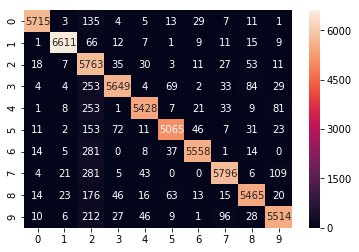

In [51]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [52]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [53]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

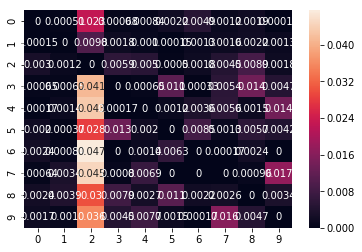

In [54]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [64]:
X_test = scaler.fit_transform(X_test.astype(np.float64))
y_test_pred = clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [65]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 946,    0,   19,    1,    0,    4,    7,    2,    1,    0],
       [   0, 1124,    6,    0,    0,    1,    2,    1,    1,    0],
       [   6,    1,  995,    4,    2,    1,    0,    5,   17,    1],
       [   0,    0,   20,  967,    1,    9,    0,    4,    8,    1],
       [   0,    0,   38,    0,  925,    0,    3,    3,    2,   11],
       [   2,    0,   22,    6,    2,  843,    7,    2,    6,    2],
       [   4,    3,   30,    1,    6,    8,  902,    0,    4,    0],
       [   0,    6,   41,    2,    4,    2,    0,  954,    1,   18],
       [   3,    0,   22,    7,    3,    6,    3,    4,  924,    2],
       [   6,    4,   26,    8,    8,    2,    0,   10,    3,  942]], dtype=int64)

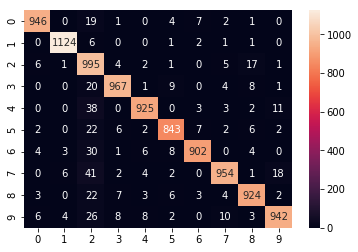

In [66]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [67]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

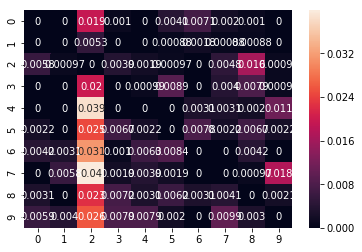

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.95220000000000005